# ***BANK MARKETING EFFECTIVENESS***

**TERM DEPOSIT**
* A term deposit is a type of deposit account held at a financial institution where money is locked up for some set period of time. 
* Term deposits are usually short-term deposits with maturities ranging from one month to a few years.

**AIM**
* PREDICT WHICH CUSTOMERS ARE MOST LIKELY TO OPEN A NEW TERM DEPOSIT (1 = Yes, 0 = No)

**What we do**

* Load data, do some EDA, data viz etc. 
* Preprocess, scale/normalize, and then Test/train split
* Train 3 classifiers - LogReg, decision tree, random forest
* Understand confusion matrix, precision, recall, accuracy
* Plot ROC curve and calculate AUC

In [154]:
#importing the libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


from sklearn.metrics import confusion_matrix

#if you don't have some of these you may need to pip install them

In [155]:
df =pd.read_csv('/Users/mm679j/Documents/2022-MMA831-Python/data/bank.csv')
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


# EDA *(Exploratory Data Analysis)*

In [156]:
df.shape

(11162, 17)

In [157]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [158]:
cat_features = df.select_dtypes('object').columns
cat_features

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [159]:
print('*All categorical features and their distinct values* \n')
for c in cat_features:
    
    print(c , ' --> ',df[c].unique())
    print()
   

*All categorical features and their distinct values* 

job  -->  ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']

marital  -->  ['married' 'single' 'divorced']

education  -->  ['secondary' 'tertiary' 'primary' 'unknown']

default  -->  ['no' 'yes']

housing  -->  ['yes' 'no']

loan  -->  ['no' 'yes']

contact  -->  ['unknown' 'cellular' 'telephone']

month  -->  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']

poutcome  -->  ['unknown' 'other' 'failure' 'success']

deposit  -->  ['yes' 'no']



In [160]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,11162.0,41.231948,11.913369,18.0,32.0,39.0,49.00,95.0
balance,11162.0,1528.538524,3225.413326,-6847.0,122.0,550.0,1708.00,81204.0
day,11162.0,15.658036,8.420740,1.0,8.0,15.0,22.00,31.0
duration,11162.0,371.993818,347.128386,2.0,138.0,255.0,496.00,3881.0
campaign,11162.0,2.508421,2.722077,1.0,1.0,2.0,3.00,63.0
pdays,11162.0,51.330407,108.758282,-1.0,-1.0,-1.0,20.75,854.0
previous,11162.0,0.832557,2.292007,0.0,0.0,0.0,1.00,58.0


In [161]:
#checking for NULL
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

# *DATA VISUALISATION*

/Users/mm679j/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mm679j/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


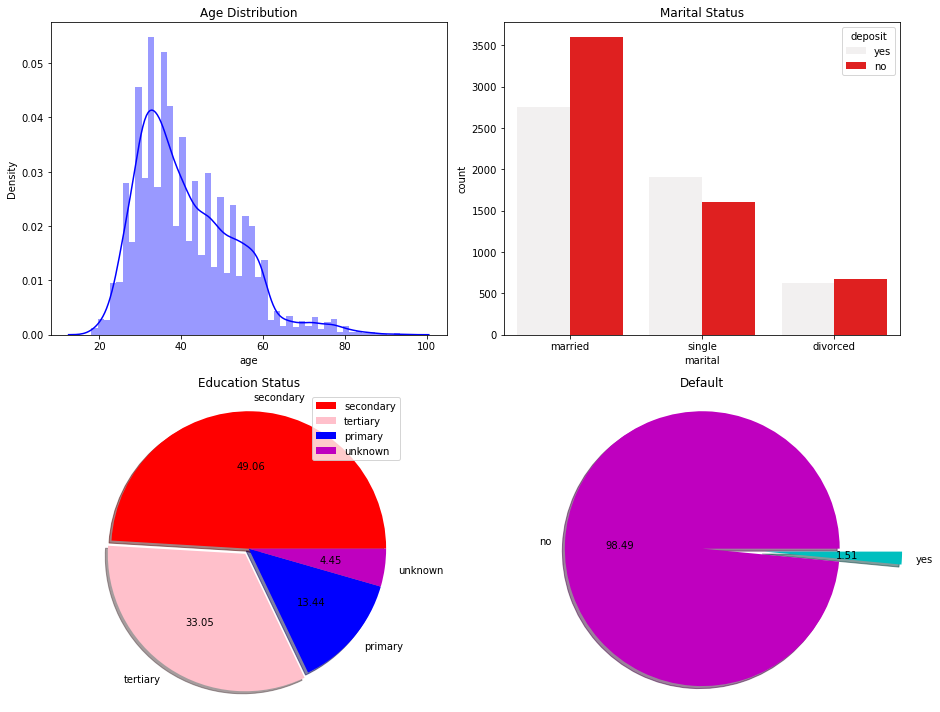

In [162]:
plt.figure(figsize = (13 ,10))

plt.subplot(2,2,1)
sns.distplot(df['age'] ,color ='b')
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.countplot(df['marital'] ,hue =df['deposit'] ,color ='r')
plt.title('Marital Status')

plt.subplot(2,2,3)
plt.pie(df['education'].value_counts() ,labels =['secondary', 'tertiary', 'primary', 'unknown'],colors =['r','pink','b' ,'m'] ,autopct ='%.2f' ,explode =[0 ,0.05,0,0] ,shadow=.5 ,radius =1.1  )
plt.legend()
plt.title('Education Status'  )

plt.subplot(2,2,4)
plt.pie(df['default'].value_counts() ,labels =['no' ,'yes'],colors =['m' ,'c'] ,autopct ='%.2f' ,explode =[0 ,0.5] ,shadow=.5 ,radius =1.1  )
plt.title('Default')

plt.tight_layout()

/Users/mm679j/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Job Status'}, xlabel='job', ylabel='count'>

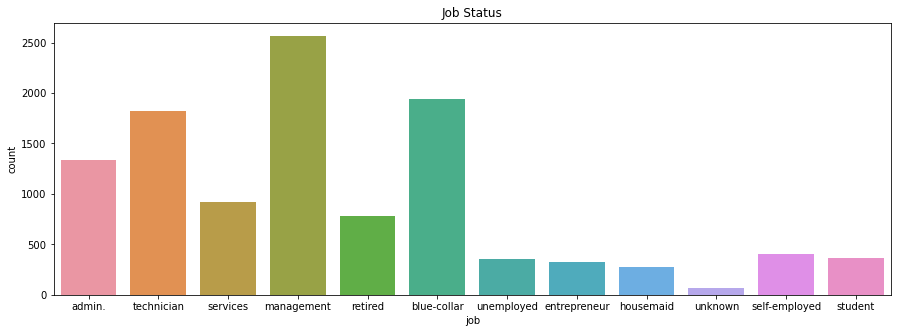

In [163]:
plt.figure(figsize =(15 ,5))
plt.title('Job Status')
sns.countplot(df['job'])


/Users/mm679j/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mm679j/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

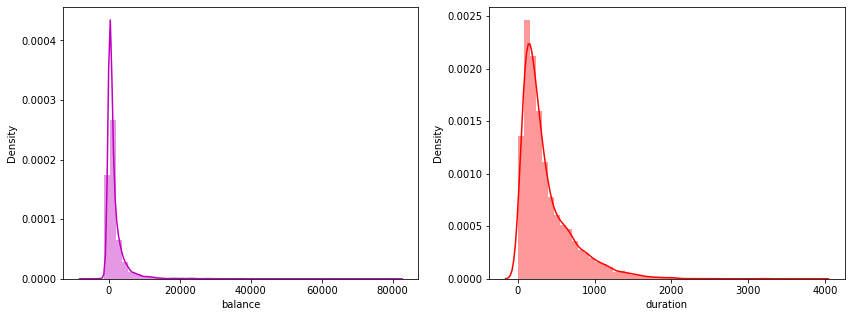

In [164]:
plt.figure(figsize = (14 ,5))
plt.subplot(1,2,1)
sns.distplot(df['balance'],color ='m')
plt.subplot(1,2,2)
sns.distplot(df['duration'] ,color ='r')

**CORRELATION MATRIX**

<AxesSubplot:>

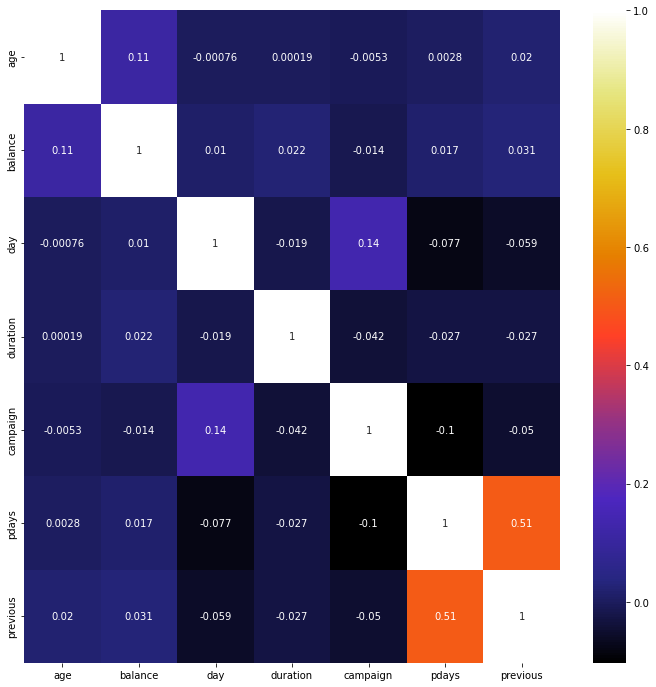

In [165]:
#corelation matrix
plt.figure(figsize = (12,12))
correlation = df.corr()
sns.heatmap(correlation ,annot =True ,cmap ='CMRmap' )

***OUTCOME OF EDA AND  DATA VISUALISATION***

**After EDA we found**
* ***No missing values***
* ***default feature donot play any significant imp role***
* ****We found some Outliers in the features (age , balance ,duration , pdays and  previous)****

# ***FEATURE ENGINEERING***

***CATEGORICAL FEATURE ENCODING***

In [166]:
df4= df
df4.select_dtypes('object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')

In [167]:
cat_cols = ['job', 'marital', 'education' ,'contact', 'month','poutcome']
for  col in cat_cols:
    df4 =pd.concat([df4.drop(col,axis =1) ,pd.get_dummies(df4[col] ,prefix =col ,drop_first=True ,dummy_na = False)],axis = 1)


In [168]:
#BOOLEAN TYPE FEATURES (YES /NO)
boolean_cols =['housing', 'loan','deposit', 'default']
for col in boolean_cols:
    df4[col +'_new']  =df4[col].apply(lambda x :1 if x =='yes' else 0)
    df4.drop(col ,axis =1 ,inplace = True)



***FINAL DATASET***

In [169]:
df4

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,housing_new,loan_new,deposit_new,default_new
0,59,2343,5,1042,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,56,45,5,1467,1,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,41,1270,5,1389,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
3,55,2476,5,579,1,-1,0,0,0,0,...,0,0,0,0,0,1,1,0,1,0
4,54,184,5,673,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,20,257,1,-1,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
11158,39,733,16,83,4,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11159,32,29,19,156,2,-1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
11160,43,0,8,9,2,172,5,0,0,0,...,0,0,0,0,0,0,0,1,0,0


**TEST/TRAIN SPLIT**


In [170]:
from sklearn.model_selection import train_test_split
x= df4.drop(['deposit_new'],axis =1)
y= df4['deposit_new']
x_train , x_test , y_train , y_test = train_test_split(x ,y, test_size = 0.2 , random_state = 51)

In [171]:
print(len(x_train) ,len(x_test))

8929 2233


***SCALING THE DATA (STANDARDIZATION)***

In [172]:
from sklearn.preprocessing import StandardScaler
sc =StandardScaler()
x_train= sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [173]:
x_train

array([[ 1.15083748,  0.1990613 , -0.4308916 , ..., -0.94835811,
        -0.38640829, -0.12482927],
       [-0.93988713, -0.4214041 ,  0.63741062, ...,  1.05445399,
        -0.38640829, -0.12482927],
       [-1.44166104, -0.31466711, -1.49919382, ..., -0.94835811,
        -0.38640829, -0.12482927],
       ...,
       [-0.68900018,  0.0267098 , -1.38049357, ...,  1.05445399,
        -0.38640829, -0.12482927],
       [-0.85625815, -0.55172602,  0.16260963, ...,  1.05445399,
        -0.38640829, -0.12482927],
       [-1.02351612, -0.33855443,  0.75611087, ..., -0.94835811,
        -0.38640829, -0.12482927]])

# *MODEL Training*


### Fit a logistic regression

In [174]:
# fit a logistic regression 
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(x_train, y_train)

y_pred_logreg = logreg.predict(x_test)

### Look at confusion matrix

In [175]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred_logreg)
cnf_matrix

array([[1014,  186],
       [ 199,  834]])

#### Visualize confusion matrix

Text(0.5, 257.44, 'Predicted label')

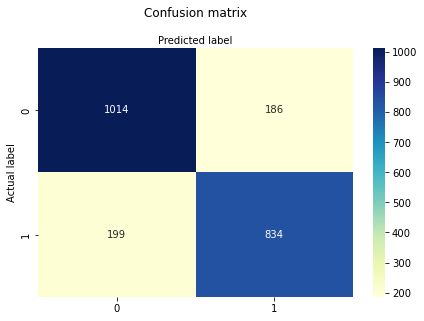

In [176]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [177]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1200
           1       0.82      0.81      0.81      1033

    accuracy                           0.83      2233
   macro avg       0.83      0.83      0.83      2233
weighted avg       0.83      0.83      0.83      2233



In [178]:
#Recap/cheat-sheet for precision, recall, accuray etc

#Precision - aka - Out of all the positive predicted, what percentage is truly positive.
# Precision = TP / TP+FP = 834 / (186+834) = 834/1020 = 0.82

# Of all total true positive, what % did we predict to be positive (aka TPR - true positive rate)
# Recall = TP / TP+FN = 834 / (834+199) = 834/1033 = 0.807 = 0.81

#F1 score - aka harmonic mea of precision and recall - takes into account both FP and FN (good for imbalanced)
#F1 = 2*Precision*Recall / (precision + recall) = 2*0.82*0.807 / (0.82+0.807) = 1.32348/1.627 = 0.813

#accuracy - % of time we are correct - sum of diagonal / total obs
# Accuracy = 1014+834 / 2233 = 1848/2233 = 0.827 = 0.83


## Second group - you will train DecisionTree
Hint: from sklearn.tree import DecisionTreeClassifier, google the rest

In [179]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth =3, random_state = 42)
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [180]:
y_pred_dt = dt.predict(x_test)

In [146]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.87      0.70      0.78      1200
           1       0.72      0.88      0.79      1033

    accuracy                           0.78      2233
   macro avg       0.79      0.79      0.78      2233
weighted avg       0.80      0.78      0.78      2233



## Third group - you will train Random Forest Classifier
Hint: from sklearn.ensemble import RandomForestClassifier, google the rest

In [147]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RF Classifier
rf=RandomForestClassifier(n_estimators=100) #number of trees, max_features, 
# see documentation for full list of tunable parameters - https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# Num of trees (n_estimators = ), # observations, max features (none, sqrt, x%), leaf size (min_sample_leaf),
# split criterion (Gini or Entropy for classification, MSE/MAE etc for regression), tree depth, etc.

#Train the model using the training sets y_pred=clf.predict(X_test)
rf.fit(x_train,y_train)

y_pred_rf=rf.predict(x_test)

In [148]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1200
           1       0.80      0.88      0.84      1033

    accuracy                           0.85      2233
   macro avg       0.85      0.85      0.85      2233
weighted avg       0.85      0.85      0.85      2233



## AUC of ROC Curve - Receiver Operating Chracterisitc 
Plot of true positive vs. false positive rate


In [149]:
# note we don't want to just predict 0 or 1, but actually just predict the probabilities without applying a threshold
# therefore we use .predict_proba instead of .predict

y_prob_logreg = logreg.predict_proba(x_test)[::,1]  #logreg
y_prob_dt = clf.predict_proba(x_test)[::,1]     #decision tree
y_prob_rf = rf.predict_proba(x_test)[::,1]      #random forest

#get fpr and tpr for each
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_prob_logreg)
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_prob_dt)
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_prob_rf)

#get AUC for each
auc_logreg = metrics.roc_auc_score(y_test, y_prob_logreg)
auc_dt = metrics.roc_auc_score(y_test, y_prob_dt)
auc_rf = metrics.roc_auc_score(y_test, y_prob_rf)

## Plot ROC Curves

Logistic regression

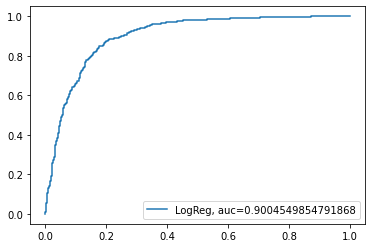

In [150]:
# Plot ROC and print AUC for LogReg
plt.plot(fpr_logreg,tpr_logreg,label="LogReg, auc="+str(auc_logreg))
plt.legend(loc=4)
plt.show()

Decision tree

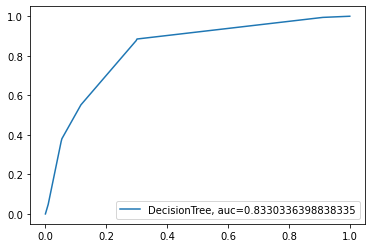

In [151]:
# Plot ROC and print AUC for DT
plt.plot(fpr_dt,tpr_dt,label="DecisionTree, auc="+str(auc_dt))
plt.legend(loc=4)
plt.show()

Random forest

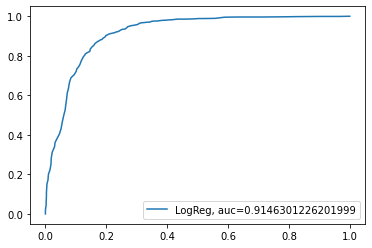

In [153]:
# Plot ROC and print AUC for RF
plt.plot(fpr_rf,tpr_rf,label="LogReg, auc="+str(auc_rf))
plt.legend(loc=4)
plt.show()